In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from python_analysis import *
import matplotlib.animation as animation
from numpy import random

In [7]:
# impose dimensions of figures and font

plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size': 23})

# MOL for (1+1) dimensional system of equation

In [239]:
names = []
ns1 = 15
shift1 = 15
for i in range(shift1,ns1):
    names = pd.read_csv("./data/wave_equation/data"+str(i)+"/name_of_file") 
    #print(names[i].name.size)
    
ns = 17
shift = 16
for i in range(shift,ns):
    names = pd.read_csv("./data/log_comp/data"+str(i)+"/name_of_file") 
# wave eq. radiative bound for PI, no bound for PI.
#  no dissipation
# step 200
#time 20
#data0 dx=0.1
#data1 dx=0.05
#data2 dx=0.01
#data3 dx=0.05 -> ad hoc ghost extr.

#int_time=20
#spherical wave eq
#data4 dx=0.05  2 ord ghost_extr
#data5 dx=0.05 6 ord ghost extr spherical simm
#data6 "..." 4 ord ghost extr sherical simm
#data7 dx=0.01 4 ord ghost extr sherical simm
#data8 "dx = 0.05                " + art diss eps=0.02
#data9 "..." eps=0.01
#data10 eps=0.03
#data11 eps=0.0005
#data12 eps=0.0001
#data13 dx=0.005, 4 ord gp extr, no diss
#data14 dx=0.05 epsilom=0.025
#data15 eps=0.04
#data16 eps=0.05
#data17 eps=0.075
#data18 eps=0.1

#dx=0.01
#data19 = data7 but the runtime is 40 (before was 20)
#data20 "..." Husa art diss eps=0.02
#data21 = ... , eps=0.05
#data22= ... eps=0.01
#data23= ... eps=0.0075
#data24= ... eps=0.015
#data25= ... eps=0.0125
#data26      eps=0.009
#data27      eps=?
#data28      eps=?
#data29      
#data30 dx=0.005 eps= 0.0075

# for comparison with model 1, spherical symmetrical wave equation
#data31 dx=0.05, time_int = 10, step to save=250, eps=0
#data32 dx=0.05 time_int=10, step to save = 250, eps=0, initial Phi=null,initial PI =exp(x^2) * a, a=2
#data33 is data 32 wih dx=0.01 + art diss: eps=0.02
#data34 amplitude=10, dx=0.01, t=10, step=250, initial PI =-exp(x^2) * a, a=2 -> divergence!

# here something wrong was happening
#model1
#data0 dx=0.05, ampl=1
#data1  ampl=2
#data2 amol=5
#data3 ampl=20
#data4 ampl=50

# here we use
#dx=0.01
#focus on the beginning of the evolution
#data5 (data34) but we have model1_PI instead of spherical_wave_eq -> divergence, good correspondence with data 34!
#data6 is data 5 but amplitude = 5
#data7 dx =0.01, t=10, step=250, eps=0, amplitude=10

#new stocking method
#data8
names.names


0    ./data/log_comp/data16/ampl_2.340000_eps0.0000...
1    ./data/log_comp/data16/ampl_2.340000_eps0.0000...
2    ./data/log_comp/data16/ampl_2.340000_eps0.0000...
3    ./data/log_comp/data16/ampl_2.340000_eps0.0000...
4    ./data/log_comp/data16/ampl_2.340000_eps0.0000...
Name: names, dtype: object

In [240]:
range_time = 12
number_steps = 300
len_step = range_time / number_steps
times = np.arange(0,range_time+len_step,len_step)
times

array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
        0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
        0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ,  1.04,
        1.08,  1.12,  1.16,  1.2 ,  1.24,  1.28,  1.32,  1.36,  1.4 ,
        1.44,  1.48,  1.52,  1.56,  1.6 ,  1.64,  1.68,  1.72,  1.76,
        1.8 ,  1.84,  1.88,  1.92,  1.96,  2.  ,  2.04,  2.08,  2.12,
        2.16,  2.2 ,  2.24,  2.28,  2.32,  2.36,  2.4 ,  2.44,  2.48,
        2.52,  2.56,  2.6 ,  2.64,  2.68,  2.72,  2.76,  2.8 ,  2.84,
        2.88,  2.92,  2.96,  3.  ,  3.04,  3.08,  3.12,  3.16,  3.2 ,
        3.24,  3.28,  3.32,  3.36,  3.4 ,  3.44,  3.48,  3.52,  3.56,
        3.6 ,  3.64,  3.68,  3.72,  3.76,  3.8 ,  3.84,  3.88,  3.92,
        3.96,  4.  ,  4.04,  4.08,  4.12,  4.16,  4.2 ,  4.24,  4.28,
        4.32,  4.36,  4.4 ,  4.44,  4.48,  4.52,  4.56,  4.6 ,  4.64,
        4.68,  4.72,  4.76,  4.8 ,  4.84,  4.88,  4.92,  4.96,  5.  ,
        5.04,  5.08,

In [241]:

big_DF = []
for n in range(0,ns1-shift1):
    # read the datas and put them in a Panda's database 
    DF1 = []
    for i in range(0,int(names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF1.append(df)

    DF2 = []
    for i in range(int(names[n].name.size/3),int(2*names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF2.append(df)

    DF3 = []
    for i in range(int(2*names[n].name.size/3),int(names[n].name.size)):
        df = pd.read_csv(names[n].name[i])
        DF3.append(df)
    DF = [DF1,DF2,DF3]
    #print(DF1[0].size)
    #print(DF2[0].size)
    #print(DF3[0].size)
    print("data"+str(n+shift1)+" added")
    big_DF.append(DF)

for n in range(ns1-shift1,ns-shift+(ns1-shift1)):
    # read the datas and put them in a Panda's database 
    DF1 = []
    for i in range(0,int(names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF1.append(df)

    DF2 = []
    for i in range(int(names[n].name.size/3),int(2*names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF2.append(df)

    DF3 = []
    for i in range(int(2*names[n].name.size/3),int(names[n].name.size)):
        df = pd.read_csv(names[n].name[i])
        DF3.append(df)
    DF = [DF1,DF2,DF3]
    #print(DF1[0].size)
    #print(DF2[0].size)
    #print(DF3[0].size)
    print("data"+str(n+shift)+" added")
    big_DF.append(DF)


KeyError: 0

In [226]:
print(names.names[0])

./data/log_comp/data16/ampl_2.340000_eps0.000000_dx_0.050000.csv


In [242]:
%%time
h1 = 0.05
h2 = h1/2
h3 = h2/2
domain_lenght = 2.5
gl = 2
gr = 2
N_point1 = int(domain_lenght/h1+1)+gl+gr
N_point2 = int(domain_lenght/h2+1)+gl+gr
N_point3 = int(domain_lenght/h3+1)+gl+gr
big_DF = []
for n in range (0, 5):
    DF1, DF2, DF3 = [], [], []
    for i in range (0,number_steps):
        DF1.append( pd.read_csv(names.names[n],skiprows = (N_point1+1)*i,nrows =N_point1) )
        DF2.append( pd.read_csv(names.names[n],skiprows = (N_point1+1)*(number_steps+1)+ (N_point2+1)*i,nrows =N_point2) )
        DF3.append( pd.read_csv(names.names[n],skiprows = (N_point1+1)*(number_steps+1)+ (N_point2+1)*(number_steps+1)+(N_point3+1)*i,nrows =N_point3) )
    big_DF.append([DF1,DF2,DF3])
    print(names.names[n]+ " added")
        


./data/log_comp/data16/ampl_2.340000_eps0.000000_dx_0.050000.csv added
./data/log_comp/data16/ampl_2.340000_eps0.000000_dx_0.050000.csv added
./data/log_comp/data16/ampl_2.340000_eps0.000000_dx_0.050000.csv added
./data/log_comp/data16/ampl_2.340000_eps0.000000_dx_0.050000.csv added
./data/log_comp/data16/ampl_2.340000_eps0.000000_dx_0.050000.csv added
CPU times: user 22.4 s, sys: 610 ms, total: 23 s
Wall time: 23 s


In [238]:
print(N_point1,N_point2,N_point3)


53 103 203


In [229]:
# big_Df index:
# big_DF[run][dx][time]
big_DF[0][2][1]

,x,field0,field1
0,-0.0125,-2.645740e+00,-2.188280e-02
1,0.0000,-2.647660e+00,0.000000e+00
2,0.0125,-2.645740e+00,2.188280e-02
3,0.0250,-2.639960e+00,4.370600e-02
4,0.0375,-2.630370e+00,6.532590e-02
...,...,...,...
198,2.4625,-1.746350e-10,1.446450e-10
199,2.4750,-1.418940e-10,1.100770e-10
200,2.4875,-1.147250e-10,8.260890e-11
201,2.5000,-9.410390e-11,6.160620e-11


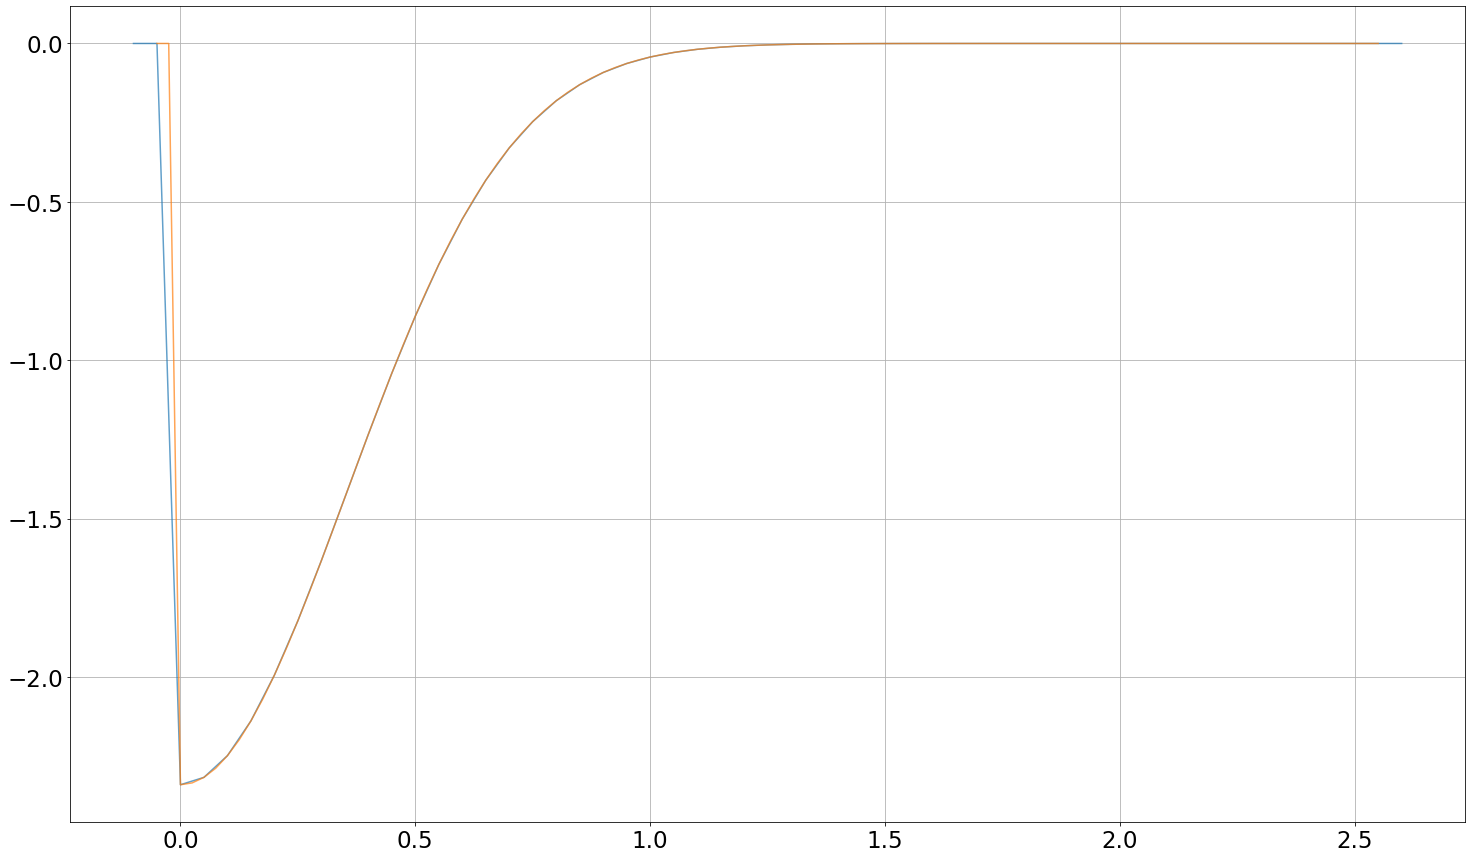

In [243]:
for n in range(0,1):
    for i in range(0,2):
        #plt.plot(DF[i][1]['x'],initialize_func_vect(gauss_PI,DF[i][1]['x'],DF[i][1]['x'][1]-DF[i][1]['x'][1],times[1]),'+',alpha=0.7,label="theo",markersize=15)
        plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field0'],alpha=0.7,markersize=25)
        #plt.plot(DF[i][-1]['x'],DF[i][0]['field1']-initialize_func_vect(gauss_PI,DF[i][10]['x'],DF[i][10]['x'][10]-DF[i][10]['x'][10],times[-1]),alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)


    #plt.plot(DF[-1][-1]['x'],(DF[-1][-1]['x']*0+times[-1])*4,'.',alpha=0.4,label='theoretical',markersize=15)
    #plt.plot(DF[-1][-1]['x'],2*(DF[-1][-1]['x'])**2+2*times[-1]**2,'.',alpha=0.4,label='theoretical',markersize=15)

#plt.legend()
plt.grid()
#plt.xlim([0, 4])
#plt.ylim([-0.00001, 0.00001])

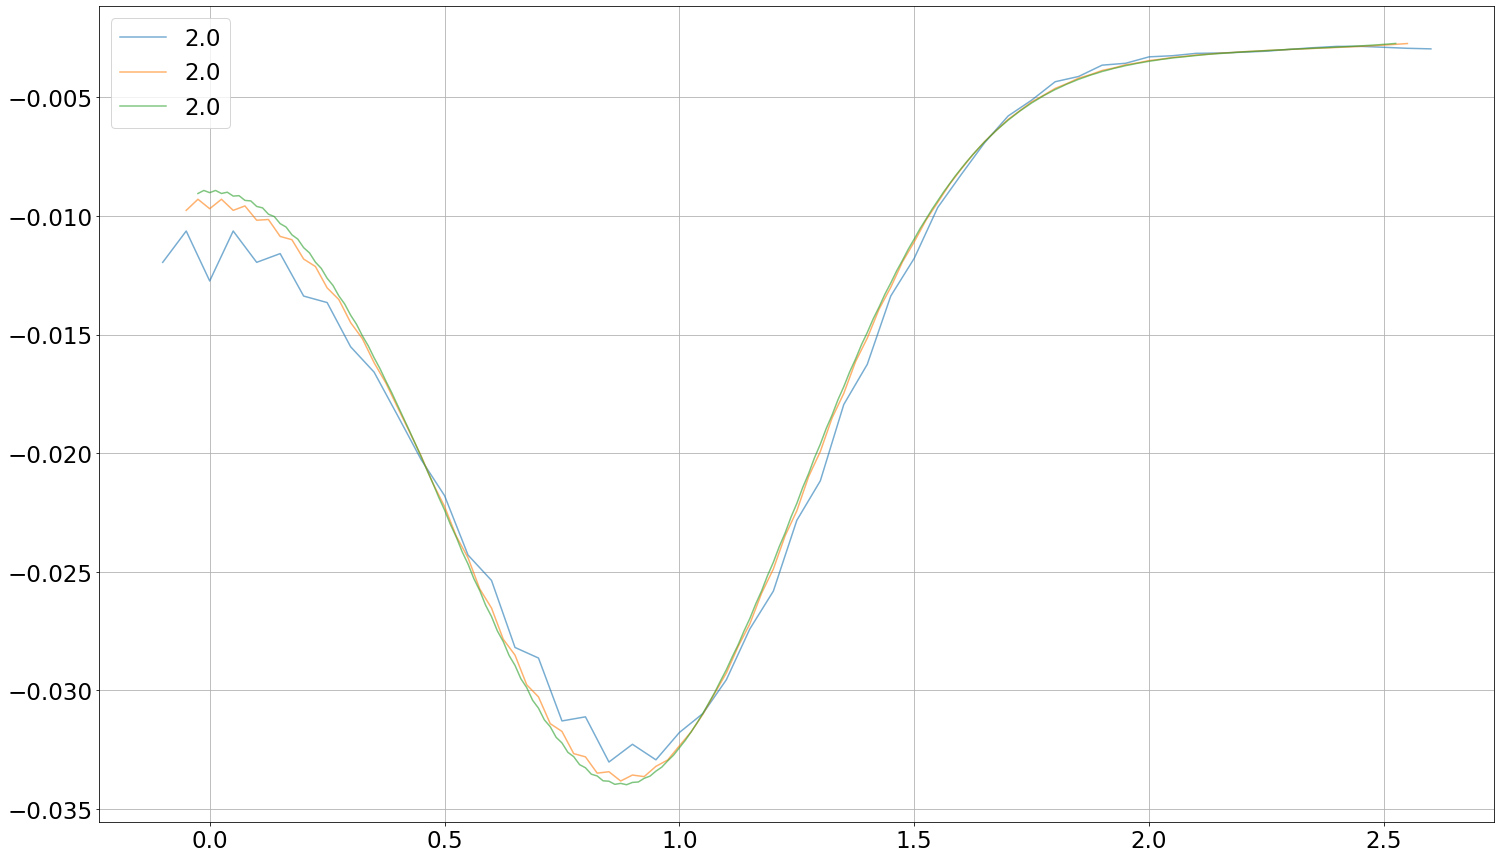

In [244]:
""""
for i in range(0,0):
        for j in range(39,40):
            plt.plot(big_DF[0][i][j]['x'],big_DF[0][i][j]['field0'],alpha=0.6,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],DF[i][j]['field1'],alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],DF[i][j]['field2'],alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],initialize_func_vect(gauss_PI,DF[i][0]['x'],DF[i][0]['x'][0]-DF[i][0]['x'][10],times[j]),'.-',alpha=0.6,label="theo",markersize=5)
"""
for n in []:
    for i in range(0,3):
        for j in range(0,1):
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],alpha=0.6,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=15)
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],alpha=0.6,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=15)
            #plt.plot(DF[i][j]['x'],DF[i][j]['field2'],alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],initialize_func_vect(gauss_PI,DF[i][0]['x'],DF[i][0]['x'][0]-DF[i][0]['x'][10],times[j]),'.-',alpha=0.6,label="theo",markersize=5)
            #plt.plot(big_DF[n][i][j]['x'],+big_DF[n][i][j]['field0']/(1-big_DF[n][i][j]['field2']),'+-',alpha=0.3,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=15)
            plt.plot(big_DF[n][i][j]['x'],np.log(1+big_DF[n][i][j]['field2']),alpha=0.5,markersize=10)
            #plt.plot(big_DF[n][i][j]['x'],np.sin(np.log(1+big_DF[n][i][j]['field2'])),'.-',alpha=0.5,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=10)

            
            
for n in [0]:
    for i in range(0,3):
        for j in range(50,51):
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],alpha=0.6,markersize=15,label=str(times[j]))
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1'],'+-',alpha=0.4,markersize=8)
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],'+-',alpha=0.4,markersize=8)
            
            
plt.grid()
#plt.xlim([0.,2.7])
#plt.ylim([ -0.011,0.01] )
plt.legend()
#times[163]

In [199]:
# conv_test_vect = []
for i,t in enumerate(times):
    conv_test_vect.append(conv_test(DF2[i],DF3[i],gauss_PI,t))
#print(conv_test_vect)
plt.plot(times,conv_test_vect)
#plt.xlim(40,80)
#plt.ylim(1.8,2.2)
#plt.vlines(47,2,0,alpha=0.2)
plt.grid()


NameError: name 'conv_test_vect' is not defined

/home/giulio/Università/Thesis/code/python_analysis.py:54: RuntimeWarning: invalid value encountered in double_scalars
  return(np.log(norm_diff_1/norm_diff_2)/np.log(2.0))


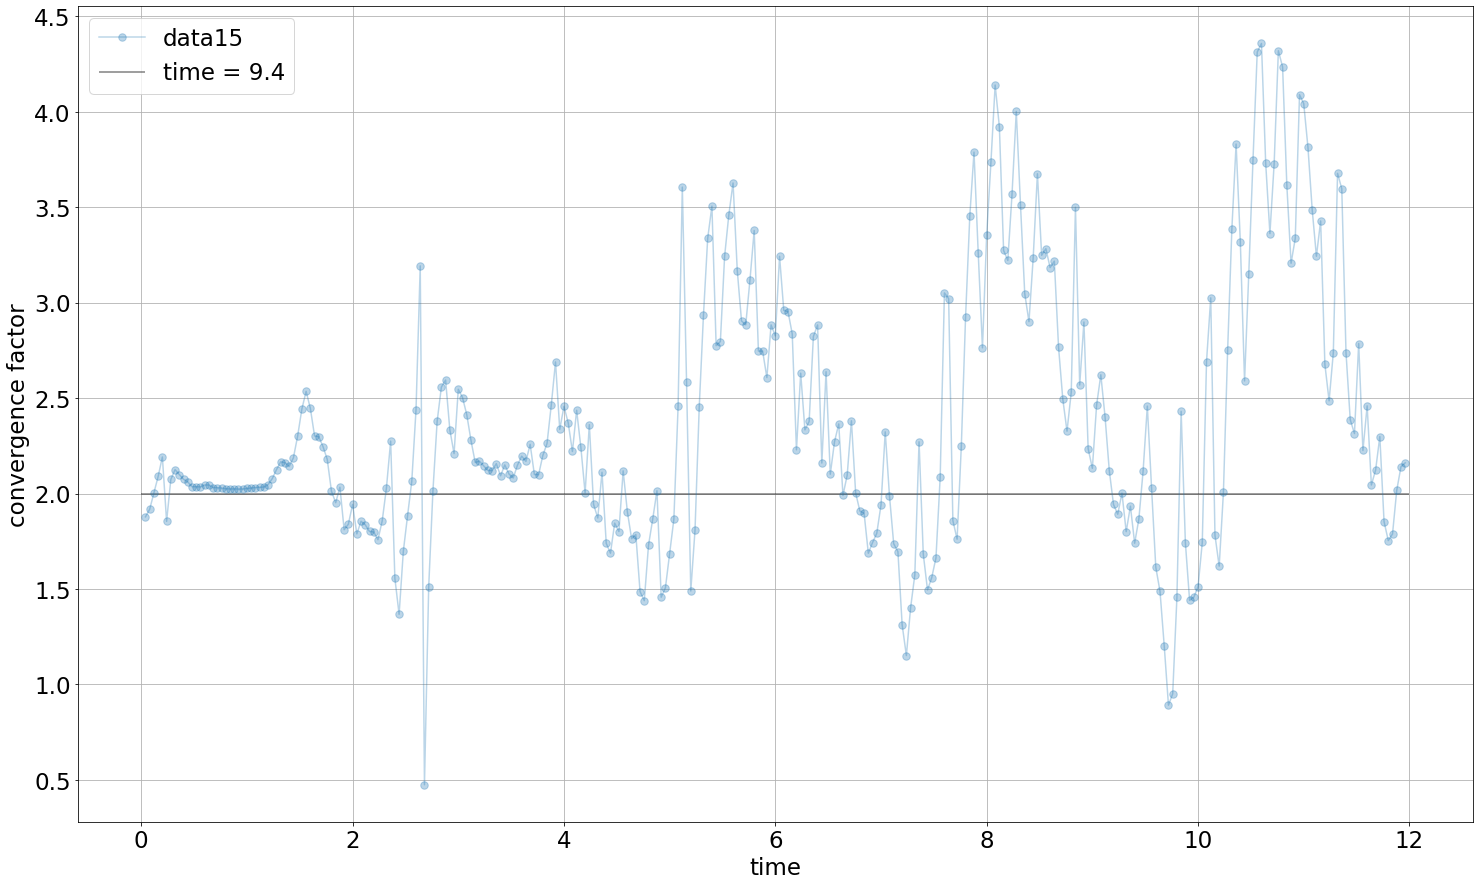

In [245]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
"""
for i,t in enumerate(times[::2]):
        self_conv_test_vect.append(self_conv_test(big_DF[0][0][i],big_DF[0][1][i],big_DF[0][2][i]))
        allruns_self_conv_test_vect.append(self_conv_test_vect)
#plt.plot(times[::2], self_conv_test_vect,markersize=10,alpha=0.5,label=label_vector[0])
"""
for n in range(0,1):
    self_conv_test_vect = []
    for i,t in enumerate(times[0:-1]):
        self_conv_test_vect.append(self_conv_test(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i],gl,gr))
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times[0:-1], self_conv_test_vect,'.-',markersize=15,alpha=0.3,label="data"+str(n+shift1))
#plt.xlim(0,40)
#plt.ylim(1.5,2.5)
#plt.xlabel('time')
plt.ylabel('convergence factor')
plt.xlabel('time')
#plt.vlines(0.652,0,5,alpha=0.5,label="time = 9.4")
plt.hlines(2,0,12,alpha=0.5,label="time = 9.4")

plt.grid()
plt.legend()


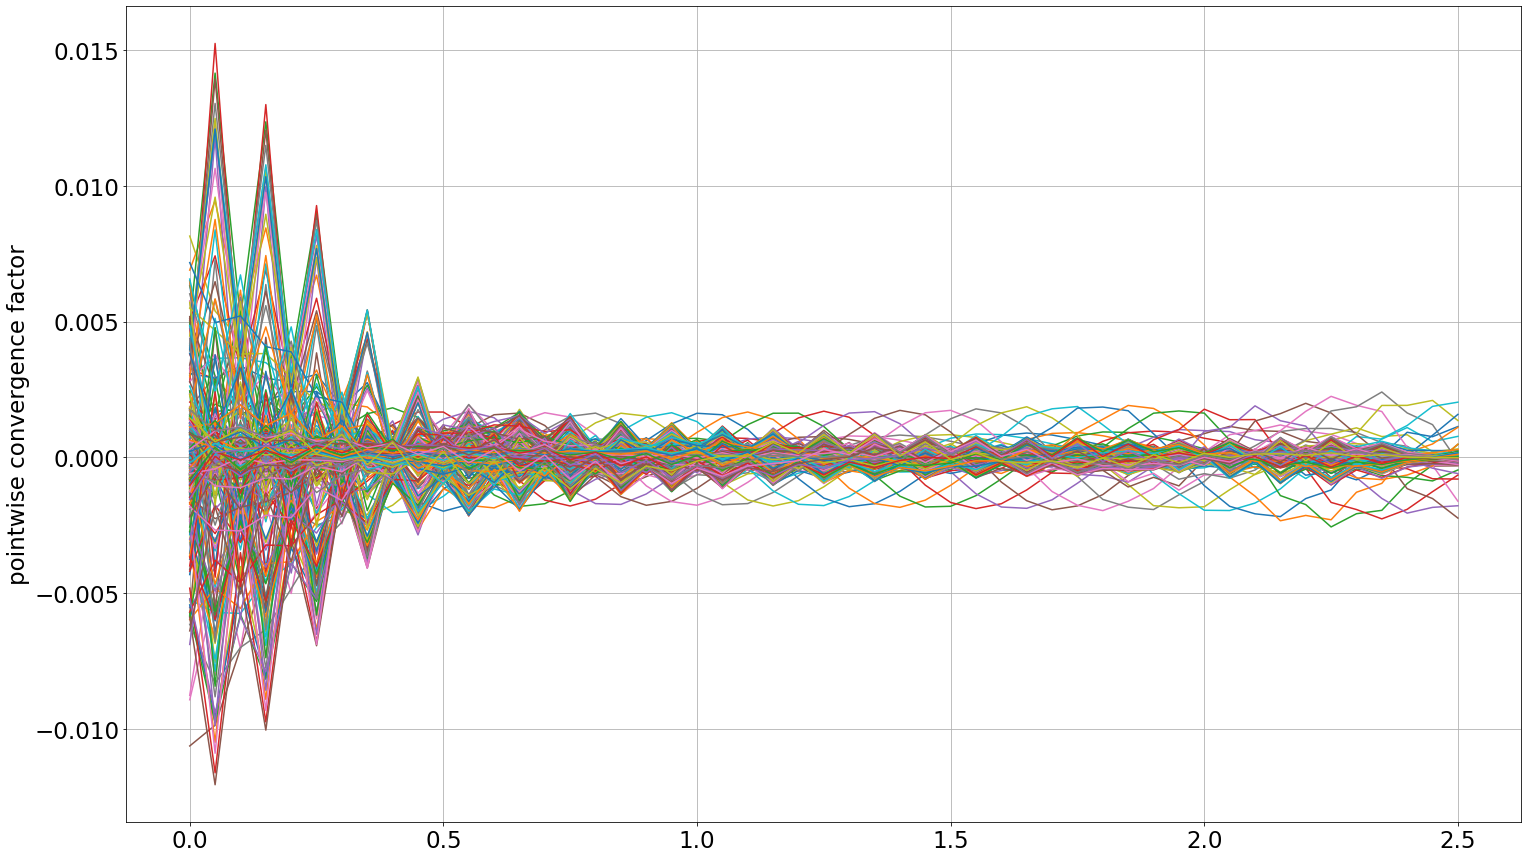

In [233]:
n_ind = 0
self_conv_test_vect_pw = []
for j in range(0,number_steps-1):
    self_conv_test_vect_pw.append(self_conv_test_pw(big_DF[n_ind][0][j], big_DF[n_ind][1][j], big_DF[n_ind][2][j],gl,gr))
    plt.plot(big_DF[n_ind][0][0]['x'][gl:-gr],self_conv_test_vect_pw[j][0]-self_conv_test_vect_pw[j][1],markersize=15)
    #plt.hlines(np.mean(self_conv_test_vect_pw[j]),-5,5,alpha=0.4)

#plt.plot(times,self_conv_test_vect_pw,label="conv_test")
#plt.xlim(-3.5,-3.7)
#plt.ylim(1.95,2.1)
#plt.xlabel('time')
plt.ylabel('pointwise convergence factor')
plt.grid()
#plt.legend()
#print(self_conv_test_vect_pw[-24])

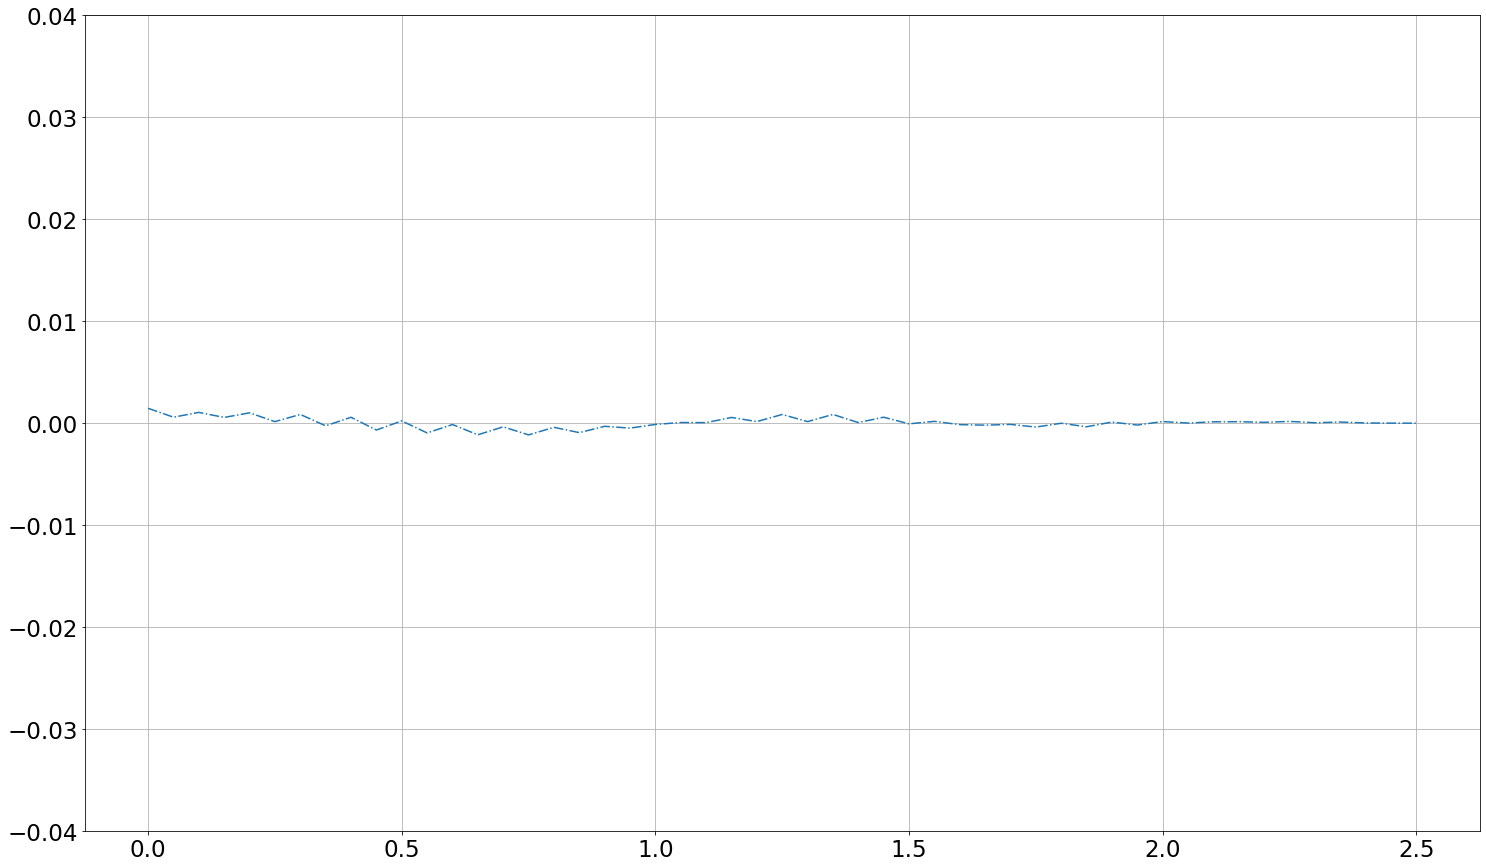

In [234]:
fig, ax = plt.subplots()

line1, = ax.plot(big_DF[n_ind][0][1]['x'][gl:-gr], self_conv_test_vect_pw[1][0]-self_conv_test_vect_pw[1][1],'-.')
#line2, = ax.plot(DF[0][1]['x'], self_conv_test_vect_pw[1][1],'.')
plt.grid()
plt.ylim(-0.04,0.04)


def animate1(i):
    line1.set_ydata(self_conv_test_vect_pw[i][0]-self_conv_test_vect_pw[i][1])  # update the data.
    return line1,

#def animate2(i):
#    line2.set_ydata(self_conv_test_vect_pw[i][0])  # update the data.
#    return line2,


ani = animation.FuncAnimation(
    fig, animate1, interval=80, blit=True, frames=number_steps-1)
ani.save("pw_conv.mp4")



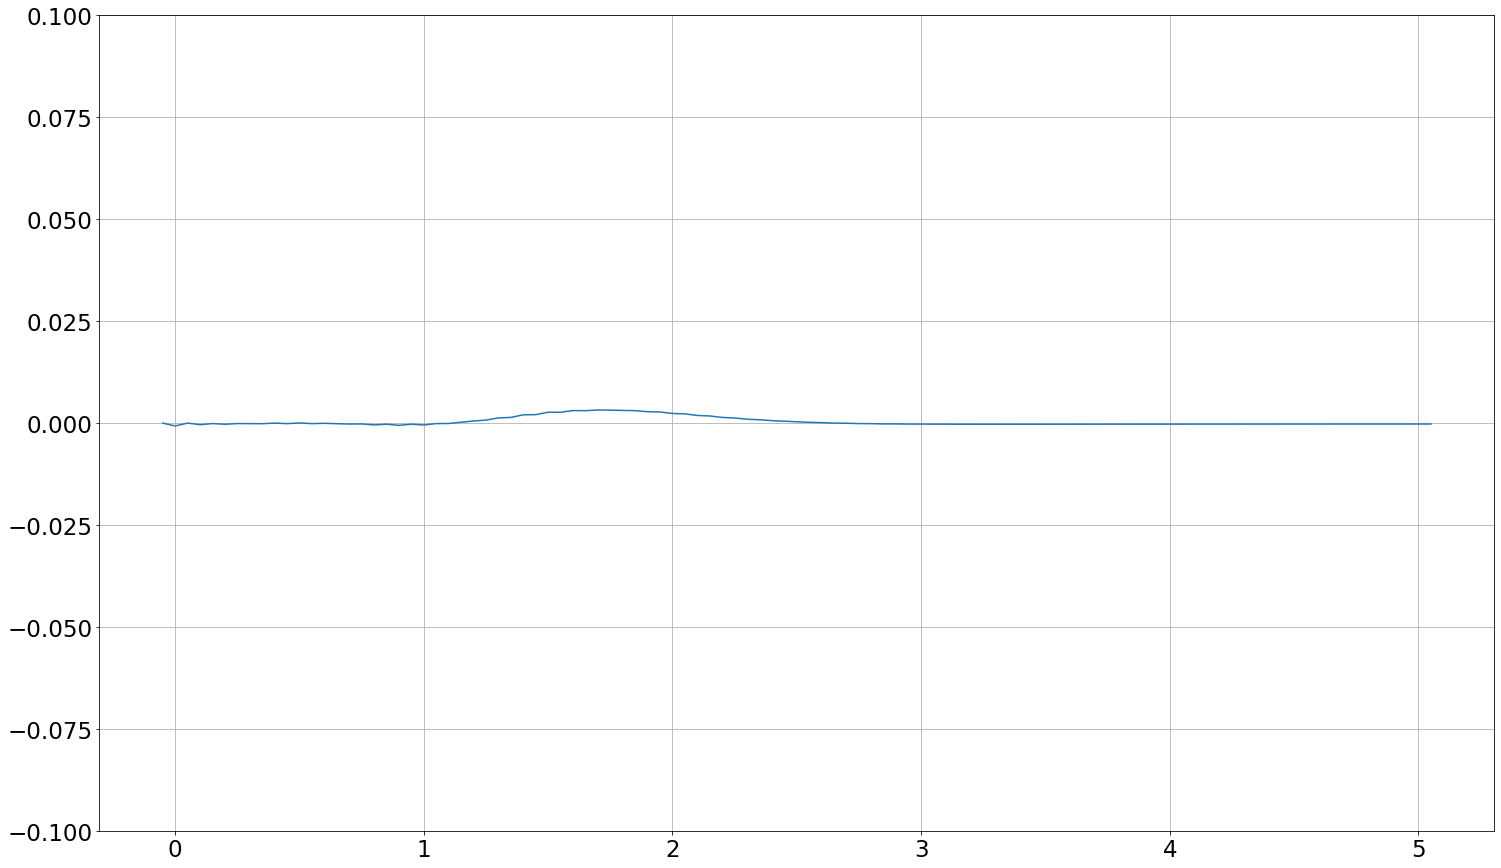

In [222]:
fig, ax = plt.subplots()
field = 0
n_ind = 0
big_DF_ind = 0
data_name = "./data/wave_equation/data"+str(shift)+"/field"+str(field)+".mp4"
line, = ax.plot(big_DF[big_DF_ind][0][0]['x'], big_DF[big_DF_ind][0][0]['field'+str(field)])
plt.ylim(-0.1,0.1)
#plt.xlim(-5,0)
plt.grid()

def animate(i):
    #line.set_xdata(DF[0][i]['x'])
    line.set_ydata(big_DF[big_DF_ind][0][i]['field'+str(field)])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=number_steps-1)
ani.save(data_name)



In [ ]:
fig = plt.figure()
ax1 = plt.axes(ylim=(-40,20),xlim=(0,5))
line, = ax1.plot([], [])
plt.xlabel('x')
plt.ylabel('field0')
plotlays, plotcols = [7], ["blue","darkred","cadetblue","olive","plum","orange","navy"]
lines = []
for index in range(7):
    lobj = ax1.plot([],[],'-.',lw=3,color=plotcols[index],alpha=0.6)[0]
    lines.append(lobj)

    
x1,y1 = [big_DF[0][0][0]['x']],[ big_DF[0][0][0]['field0']]
x2,y2 = [big_DF[1][0][0]['x']],[ big_DF[1][0][0]['field0']]
x3,y3 = [big_DF[2][0][0]['x']],[ big_DF[1][0][0]['field0']]
x4,y4 = [big_DF[3][0][0]['x']],[ big_DF[1][0][0]['field0']]
x5,y5 = [big_DF[4][0][0]['x']],[ big_DF[1][0][0]['field0']]
x6,y6 = [big_DF[5][0][0]['x']],[ big_DF[1][0][0]['field0']]
x7,y7 = [big_DF[6][0][0]['x']],[ big_DF[1][0][0]['field0']]


def init():
    for line in lines:
        line.set_data([x1,x2,x3,x4,x5,x6,x7],[y1,y2,y3,y4,y5,y6,y7])
    return lines





def animate(i):

    x1 = big_DF[0][0][0]['x']
    y1 = big_DF[0][0][i]['field0']
    #x1.append(x)
    #y1.append(y)

    x2 = big_DF[1][0][0]['x']
    y2 = big_DF[1][0][i]['field0']
    #x2.append(x)
    #y2.append(y)
    
    x3 = big_DF[2][0][0]['x']
    y3 = big_DF[2][0][i]['field0']
    
    x4 = big_DF[3][0][0]['x']
    y4 = big_DF[3][0][i]['field0']
    
    x5 = big_DF[4][0][0]['x']
    y5 = big_DF[4][0][i]['field0']
    
    x6 = big_DF[5][0][0]['x']
    y6 = big_DF[5][0][i]['field0']
    
    x7 = big_DF[6][0][0]['x']
    y7 = big_DF[6][0][i]['field0']

    xlist = [x1,x2,x3,x4,x5,x6,x7]
    ylist = [y1, y2,y3,y4,y5,y6,y7]

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=number_steps-1, interval=50, blit=True)

plt.grid()
plt.show()
anim.save("fields.mp4")